In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
design.chips.main.size_x = '14mm'
design.chips.main.size_y = '10mm'

In [3]:
gui = MetalGUI(design)

In [4]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 8
design_span_y = 4

half_chip_width = design_span_x // 2
half_chip_height = design_span_y // 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [5]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q2', 'a', 'Q1', 'b', '14851.48 um', f'+{asym_h}um', '0.4mm', '0.2mm'))
cpw.append(connect('cpw2', 'Q3', 'b', 'Q2', 'b', '14705.88 um', f'-{asym_v}um', '1mm', '1mm'))
cpw.append(connect('cpw3', 'Q3', 'a', 'Q4', 'b', '14563.1 um', f'+{asym_h}um', '0.4mm', '0.2mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '14423.07 um', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '14285.71 um', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [6]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-6mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '6mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-6mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '6mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [7]:
readout_lines = []

asym_14 = 1000
asym_23 = 1000
options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '10714.28um', f'{asym_14}um'))
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '10563.38um', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '10416.66um', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '10273.97um', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [8]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-5, -1.92])
anchors1c[1] = np.array([-5, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([5, 1.92])
anchors4c[1] = np.array([5, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

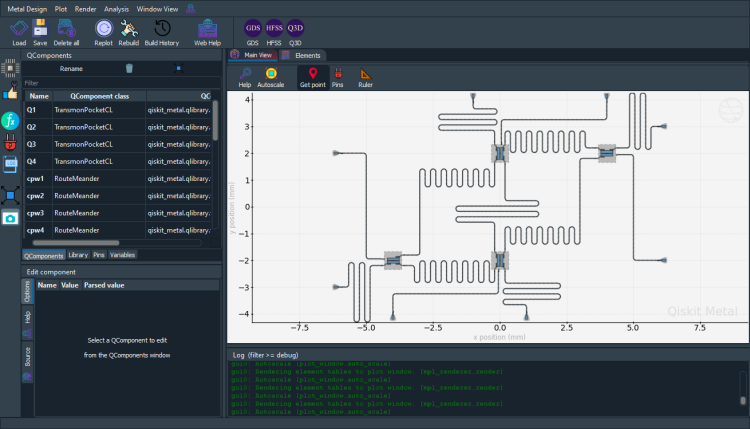

In [9]:
gui.screenshot()

In [10]:
# Qubit Frequencies
# Q1 : 5
# Q2 : 5.1
# Q3 : 5.2
# Q4 : 5.3

# CPW Frequencies
# cpw1 : 5.05
# cpw2 : 5.1
# cpw3 : 5.15
# cpw4 : 5.2
# cpw5 : 5.25

# Readout Frequencies
# R1 : 7
# R2 : 7.1
# R3 : 7.2
# R4 : 7.3

In [11]:
# CPW length calculator
freq = 5.25 * (10**9)
c = 3 * (10**8)
lamb = c / freq * (10**6)
lamb/4

14285.714285714284

### LOM Analyses

#### Qubit (Q1)

In [12]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")
q3d1 = c1.sim.renderer
q3d1.start()

INFO 01:30AM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:30AM [load_ansys_project]: 	Opened Ansys App
INFO 01:30AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 01:30AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 01:30AM [connect_design]: No active design found (or error getting active design).
INFO 01:30AM [connect]: 	 Connected to project "Project3". No design detected


True

In [14]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '400um'
transmons[0].options.pad_height = '90um'
gui.rebuild()

q3d1.activate_ansys_design("Tune_Q1", 'capacitive')
q3d1.render_design(['Q1'], [('Q1', 'c'), ('Q1', 'a'),('Q1', 'b'),('Q1', 'Charge_Line')])

01:33AM 23s WARNING [activate_ansys_design]: The design_name=Tune_Q1 was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 01:33AM [connect_design]: 	Opened active design
	Design:    Tune_Q1 [Solution type: Q3D]
WARNING 01:33AM [connect_setup]: 	No design setup detected.
WARNING 01:33AM [connect_setup]: 	Creating Q3D default setup.
INFO 01:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [ ]:
#q3d1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q1.png")

In [15]:
q3d1.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d1.analyze_setup("Setup")
c1.sim.capacitance_matrix, c1.sim.units = q3d1.get_capacitance_matrix()
c1.sim.capacitance_all_passes, _ = q3d1.get_capacitance_all_passes()
c1.sim.capacitance_matrix

INFO 01:37AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:37AM [analyze]: Analyzing setup Setup
INFO 01:40AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmps6duxnju.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:40AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp5bppubw_.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:40AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpwkeo3oa6.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:40AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpct431l_u.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 01:40AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q1,b_connector_pad_Q1,c_connector_pad_Q1,cl_metal_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1
a_connector_pad_Q1,50.15692,-0.34468,-0.47109,-0.00949,-33.57220,-13.35911,-1.52843
b_connector_pad_Q1,-0.34468,50.07750,-0.14760,-0.01168,-33.69149,-1.50103,-13.49385
c_connector_pad_Q1,-0.47109,-0.14760,50.08901,-0.05290,-33.60998,-13.34140,-1.58909
cl_metal_Q1,-0.00949,-0.01168,-0.05290,15.64235,-15.16714,-0.12122,-0.20327
ground_main_plane,-33.57220,-33.69149,-33.60998,-15.16714,245.85165,-32.79146,-37.17635
pad_bot_Q1,-13.35911,-1.50103,-13.34140,-0.12122,-32.79146,89.11864,-25.58050
pad_top_Q1,-1.52843,-13.49385,-1.58909,-0.20327,-37.17635,-25.58050,82.28024


In [16]:
c1.setup.junctions = Dict(Lj=12, Cj=1)
c1.setup.freq_readout = 7.0
c1.setup.freq_bus = [5.2, 5.05, 5]

c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.075063 [GHz]
EC 262.945395 [MHz]
EJ 13.616300 [GHz]
alpha -301.090267 [MHz]
dispersion 7.612380 [KHz]
Lq 11.995161 [nH]
Cq 73.666352 [fF]
T1 0.357504 [us]

**Coupling Properties**

tCqbus1 -9.247978 [fF]
gbus1_in_MHz -122.592948 [MHz]
χ_bus1 -2.175739 [MHz]
1/T1bus1 2006.135049 [Hz]
T1bus1 79.334112 [us]

tCqbus2 -1.145198 [fF]
gbus2_in_MHz -11.395503 [MHz]
χ_bus2 -1.469914 [MHz]
1/T1bus2 422.147049 [Hz]
T1bus2 377.013042 [us]

tCqbus3 7.657852 [fF]
gbus3_in_MHz 73.941645 [MHz]
χ_bus3 475.867390 [MHz]
1/T1bus3 441715.549495 [Hz]
T1bus3 0.360311 [us]

tCqbus4 -1.122265 [fF]
gbus4_in_MHz -10.742107 [MHz]
χ_bus4 4.094899 [MHz]
1/T1bus4 1039.301934 [Hz]
T1bus4 153.136387 [us]
Bus-Bus Couplings
gbus1_2 32.350517 [MHz]
gbus1_3 48.032994 [MHz]
gbus1_4 31.288359 [MHz]
gbus2_3 12.811034 [MHz]
gbus2_4 17.022930 [MHz]
gbus3_4 12.050885 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.371694,296.739734,13.6163,-343.488924,24.096539,"[-119.49781440696043, -6.881960927345478, 70.7...","[-3.121299121328074, 1.1027655931737614, 490.4...",3.121299,119.497814
2,5.274038,285.357049,13.6163,-329.117946,16.731095,"[-105.46574042145402, -13.70988531224804, 69.0...","[-2.1141033803631535, 6.549994489277345, 133.2...",2.114103,105.465740
3,5.213396,278.416148,13.6163,-320.399922,13.246553,"[-111.52180919028237, -12.216077402773195, 69....","[-2.1720011739453398, 23.251670736250784, 122....",2.172001,111.521809
4,5.153506,271.656608,13.6163,-311.942369,10.460604,"[-114.20497824098904, -12.19518009952388, 70.9...","[-2.0982192678699256, -5.568546118862524, 145....",2.098219,114.204978
5,5.129135,268.932952,13.6163,-308.543614,9.487045,"[-117.9832963045364, -11.021333894632937, 72.0...","[-2.1666317061253886, -2.7886297160812594, 176...",2.166632,117.983296
6,5.100995,265.807335,13.6163,-304.649688,8.465056,"[-119.8332155517738, -11.278683477124437, 73.0...","[-2.152107843795106, -1.9402049719679175, 251....",2.152108,119.833216
7,5.087836,264.352899,13.6163,-302.840074,8.022174,"[-121.554156559257, -11.318372073900623, 73.58...","[-2.1757427147654202, -1.6676440733980327, 327...",2.175743,121.554157
8,5.075063,262.945395,13.6163,-301.090267,7.61238,"[-122.59294829674101, -11.39550316469222, 73.9...","[-2.175738940902356, -1.4699136409533657, 475....",2.175739,122.592948


In [17]:
c1.plot_convergence()
c1.plot_convergence_chi()

Design "Tune_Q1" info:
	# eigenmodes    0
	# variations    1


INFO 01:40AM [hfss_report_full_convergence]: Creating report for variation 0


#### Qubit (Q2)

In [18]:
from qiskit_metal.analyses.quantization import LOManalysis
c2 = LOManalysis(design, "q3d")
q3d2 = c2.sim.renderer
q3d2.start()

INFO 01:40AM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:40AM [load_ansys_project]: 	Opened Ansys App
INFO 01:40AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 01:40AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 01:40AM [connect_design]: 	Opened active design
	Design:    Tune_Q1 [Solution type: Q3D]
INFO 01:40AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:40AM [connect]: 	Connected to project "Project3" and design "Tune_Q1" 😀 



True

In [19]:
transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '375um'
transmons[1].options.pad_height = '90um'
gui.rebuild()


q3d2.activate_ansys_design("Tune_Q2", 'capacitive')
q3d2.render_design(['Q2'], [('Q2', 'c'), ('Q2', 'a'),('Q2', 'b'),('Q2', 'd'),('Q2', 'Charge_Line')])

01:40AM 56s WARNING [activate_ansys_design]: The design_name=Tune_Q2 was not in active project.  Designs in active project are: 
['Tune_Q1'].  A new design will be added to the project.  
INFO 01:40AM [connect_design]: 	Opened active design
	Design:    Tune_Q2 [Solution type: Q3D]
WARNING 01:40AM [connect_setup]: 	No design setup detected.
WARNING 01:40AM [connect_setup]: 	Creating Q3D default setup.
INFO 01:40AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [20]:
#q3d2.save_screenshot(path="C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q2.png")

In [21]:
q3d2.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d2.analyze_setup("Setup")
c2.sim.capacitance_matrix, c2.sim.units = q3d2.get_capacitance_matrix()
c2.sim.capacitance_all_passes, _ = q3d2.get_capacitance_all_passes()
c2.sim.capacitance_matrix

INFO 01:41AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:41AM [analyze]: Analyzing setup Setup
INFO 01:44AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp3pc5czfm.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:44AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpwhc97smm.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:44AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp0jc1_gfh.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:44AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpdy20cu5p.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 01:44AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q2,b_connector_pad_Q2,c_connector_pad_Q2,cl_metal_Q2,d_connector_pad_Q2,ground_main_plane,pad_bot_Q2,pad_top_Q2
a_connector_pad_Q2,51.49843,-0.38151,-0.60406,-0.00985,-0.16463,-34.43034,-13.49397,-1.50163
b_connector_pad_Q2,-0.38151,51.50908,-0.16449,-0.01130,-0.60076,-34.42087,-1.50822,-13.50424
c_connector_pad_Q2,-0.60406,-0.16449,51.50849,-0.05398,-0.38096,-34.39470,-13.50025,-1.49942
cl_metal_Q2,-0.00985,-0.01130,-0.05398,15.93789,-0.15433,-15.37637,-0.10744,-0.14919
d_connector_pad_Q2,-0.16463,-0.60076,-0.38096,-0.15433,51.57119,-34.33637,-1.50781,-13.50894
ground_main_plane,-34.43034,-34.42087,-34.39470,-15.37637,-34.33637,271.32614,-29.81577,-29.75965
pad_bot_Q2,-13.49397,-1.50822,-13.50025,-0.10744,-1.50781,-29.81577,85.75726,-23.56387
pad_top_Q2,-1.50163,-13.50424,-1.49942,-0.14919,-13.50894,-29.75965,-23.56387,85.77580


In [22]:
c2.setup.junctions = Dict(Lj=12, Cj=1)
c2.setup.freq_readout = 7.1
c2.setup.freq_bus = [5.05, 5.1, 5.25, 5.1]

c2.run_lom()
c2.lumped_oscillator_all

[5, 6] [7 0 1 2 3]
Predicted Values

Transmon Properties
f_Q 5.119743 [GHz]
EC 267.887406 [MHz]
EJ 13.616300 [GHz]
alpha -307.240299 [MHz]
dispersion 9.134197 [KHz]
Lq 11.995161 [nH]
Cq 72.307349 [fF]
T1 0.217598 [us]

**Coupling Properties**

tCqbus1 -11.455192 [fF]
gbus1_in_MHz -156.307484 [MHz]
χ_bus1 -3.417386 [MHz]
1/T1bus1 3106.038494 [Hz]
T1bus1 51.240493 [us]

tCqbus2 -2.611342 [fF]
gbus2_in_MHz -25.590899 [MHz]
χ_bus2 24.291213 [MHz]
1/T1bus2 6892.872932 [Hz]
T1bus2 23.089783 [us]

tCqbus3 6.650539 [fF]
gbus3_in_MHz 65.752029 [MHz]
χ_bus3 468.014923 [MHz]
1/T1bus3 567868.941785 [Hz]
T1bus3 0.280267 [us]

tCqbus4 -2.624289 [fF]
gbus4_in_MHz -26.727158 [MHz]
χ_bus4 -7.706789 [MHz]
1/T1bus4 2155.170164 [Hz]
T1bus4 73.847971 [us]

tCqbus5 3.408616 [fF]
gbus5_in_MHz 33.949851 [MHz]
χ_bus5 124.771998 [MHz]
1/T1bus5 151392.912419 [Hz]
T1bus5 1.051271 [us]
Bus-Bus Couplings
gbus1_2 24.940538 [MHz]
gbus1_3 44.025126 [MHz]
gbus1_4 25.874240 [MHz]
gbus1_5 7.642228 [MHz]
gbus2_3 11.547276

,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.438692,304.696552,13.6163,-353.589455,30.711466,"[-149.38480024439065, -25.164296331018708, 65....","[-4.817827646407862, -32.82534814734563, 606.6...",4.817828,149.384800
2,5.357008,295.011756,13.6163,-341.301369,22.829974,"[-137.10603794180858, -24.38294933918345, 61.1...","[-3.6170716013213324, 38.5425750339666, 117.62...",3.617072,137.106038
3,5.283429,286.440595,13.6163,-330.481995,17.33877,"[-143.32144581205526, -23.736780738955765, 61....","[-3.5719704462215667, 16.434704244694903, 93.1...",3.571970,143.321446
4,5.234766,280.85104,13.6163,-323.454359,14.391857,"[-145.33324698517208, -24.244854434072106, 62....","[-3.4392266923497017, 14.835825721751538, 98.5...",3.439227,145.333247
5,5.198788,276.75869,13.6163,-318.323128,12.511573,"[-149.35435094965078, -23.952032179782485, 63....","[-3.461818357077862, 14.47597120909242, 117.17...",3.461818,149.354351
6,5.1714,273.666383,13.6163,-314.453642,11.231795,"[-151.08461551525608, -25.04522034065294, 64.1...","[-3.416366675722653, 16.828240259284804, 148.9...",3.416367,151.084616
7,5.152331,271.524967,13.6163,-311.777979,10.411688,"[-152.56926225395807, -25.079447001203775, 64....","[-3.3975292300272795, 18.29519478315223, 191.9...",3.397529,152.569262
8,5.138794,270.010546,13.6163,-309.887683,9.862667,"[-153.8445030319225, -25.32650968830784, 65.03...","[-3.3938415692764874, 20.246041745124568, 249....",3.393842,153.844503
9,5.125833,268.565087,13.6163,-308.084967,9.361611,"[-155.32358551863194, -25.5864019479163, 65.39...","[-3.401369896208582, 22.89945427951558, 361.33...",3.401370,155.323586
10,5.119743,267.887406,13.6163,-307.240299,9.134197,"[-156.30748439723186, -25.59089933799511, 65.7...","[-3.417385871031509, 24.291212988335335, 468.0...",3.417386,156.307484


In [23]:
c2.plot_convergence()
c2.plot_convergence_chi()

Design "Tune_Q2" info:
	# eigenmodes    0
	# variations    1


INFO 01:44AM [hfss_report_full_convergence]: Creating report for variation 0


#### Qubit (Q3)

In [24]:
from qiskit_metal.analyses.quantization import LOManalysis
c3 = LOManalysis(design, "q3d")
q3d3 = c3.sim.renderer
q3d3.start()

INFO 01:44AM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:44AM [load_ansys_project]: 	Opened Ansys App
INFO 01:44AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 01:44AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 01:44AM [connect_design]: 	Opened active design
	Design:    Tune_Q2 [Solution type: Q3D]
INFO 01:44AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:44AM [connect]: 	Connected to project "Project3" and design "Tune_Q2" 😀 



True

In [25]:
transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '351um'
transmons[2].options.pad_height = '90um'
gui.rebuild()

q3d3.activate_ansys_design("Tune_Q3", 'capacitive')
q3d3.render_design(['Q3'], [('Q3', 'c'), ('Q3', 'a'),('Q3', 'b'),('Q3', 'd'),('Q3', 'Charge_Line')])

01:44AM 18s WARNING [activate_ansys_design]: The design_name=Tune_Q3 was not in active project.  Designs in active project are: 
['Tune_Q1', 'Tune_Q2'].  A new design will be added to the project.  
INFO 01:44AM [connect_design]: 	Opened active design
	Design:    Tune_Q3 [Solution type: Q3D]
WARNING 01:44AM [connect_setup]: 	No design setup detected.
WARNING 01:44AM [connect_setup]: 	Creating Q3D default setup.
INFO 01:44AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [26]:
#q3d3.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q3.png")

In [27]:
q3d3.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d3.analyze_setup("Setup")
c3.sim.capacitance_matrix, c3.sim.units = q3d3.get_capacitance_matrix()
c3.sim.capacitance_all_passes, _ = q3d3.get_capacitance_all_passes()
c3.sim.capacitance_matrix

INFO 01:44AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:44AM [analyze]: Analyzing setup Setup
INFO 01:47AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpte4zqzm_.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:47AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmptvjfgk2p.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:47AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp0ahj0wib.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:47AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp889d0t65.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 01:47AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q3,b_connector_pad_Q3,c_connector_pad_Q3,cl_metal_Q3,d_connector_pad_Q3,ground_main_plane,pad_bot_Q3,pad_top_Q3
a_connector_pad_Q3,52.34141,-0.41986,-0.77781,-0.01056,-0.18664,-35.01300,-13.45232,-1.52439
b_connector_pad_Q3,-0.41986,52.35843,-0.18656,-0.01255,-0.78083,-35.02075,-1.51832,-13.47041
c_connector_pad_Q3,-0.77781,-0.18656,52.35939,-0.05625,-0.42005,-34.97310,-13.46228,-1.52518
cl_metal_Q3,-0.01056,-0.01255,-0.05625,15.96182,-0.15597,-15.42328,-0.09879,-0.13420
d_connector_pad_Q3,-0.18664,-0.78083,-0.42005,-0.15597,52.39585,-34.91370,-1.51860,-13.47207
ground_main_plane,-35.01300,-35.02075,-34.97310,-15.42328,-34.91370,269.74814,-27.75670,-27.73794
pad_bot_Q3,-13.45232,-1.51832,-13.46228,-0.09879,-1.51860,-27.75670,81.85303,-21.88730
pad_top_Q3,-1.52439,-13.47041,-1.52518,-0.13420,-13.47207,-27.73794,-21.88730,81.87950


In [28]:
c3.setup.junctions = Dict(Lj=12, Cj=1)
c3.setup.freq_readout = 7.3
c3.setup.freq_bus = [5.15, 5.1, 5.2, 5.2]

c3.run_lom()
c3.lumped_oscillator_all

[5, 6] [7 0 1 2 3]
Predicted Values

Transmon Properties
f_Q 5.225993 [GHz]
EC 279.849994 [MHz]
EJ 13.616300 [GHz]
alpha -322.198095 [MHz]
dispersion 13.911322 [KHz]
Lq 11.995161 [nH]
Cq 69.216468 [fF]
T1 0.866564 [us]

**Coupling Properties**

tCqbus1 -10.920475 [fF]
gbus1_in_MHz -158.440984 [MHz]
χ_bus1 -3.360845 [MHz]
1/T1bus1 2966.271484 [Hz]
T1bus1 53.654881 [us]

tCqbus2 -2.741829 [fF]
gbus2_in_MHz -28.323152 [MHz]
χ_bus2 27.624017 [MHz]
1/T1bus2 7259.041204 [Hz]
T1bus2 21.925064 [us]

tCqbus3 6.556554 [fF]
gbus3_in_MHz 67.017084 [MHz]
χ_bus3 117.047765 [MHz]
1/T1bus3 14783.627692 [Hz]
T1bus3 10.765622 [us]

tCqbus4 -2.758406 [fF]
gbus4_in_MHz -28.769657 [MHz]
χ_bus4 69.268951 [MHz]
1/T1bus4 64020.051136 [Hz]
T1bus4 2.486017 [us]

tCqbus5 3.331477 [fF]
gbus5_in_MHz 34.978273 [MHz]
χ_bus5 102.391986 [MHz]
1/T1bus5 94633.166456 [Hz]
T1bus5 1.681809 [us]
Bus-Bus Couplings
gbus1_2 24.962013 [MHz]
gbus1_3 44.395131 [MHz]
gbus1_4 25.187685 [MHz]
gbus1_5 7.508872 [MHz]
gbus2_3 12.200363

,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.549237,318.089771,13.6163,-370.693661,45.233276,"[-150.27767461737642, -28.194606046623104, 66....","[-4.612304973265184, -51.7231096357812, -93.38...",4.612305,150.277675
2,5.45106,306.178552,13.6163,-355.475738,32.096587,"[-140.98625700582855, -28.316651741216617, 61....","[-3.5565943602692873, 34.79196181332605, 1743....",3.556594,140.986257
3,5.3884,298.712493,13.6163,-345.988963,25.613696,"[-147.1030608663919, -24.872799087514977, 62.0...","[-3.565329661053882, 16.686430846743942, 160.6...",3.565330,147.103061
4,5.333004,292.199653,13.6163,-337.745899,20.887806,"[-149.8688130892793, -25.94195516998167, 63.55...","[-3.444378361540447, 16.04875210181732, 111.78...",3.444378,149.868813
5,5.302708,288.672422,13.6163,-333.294206,18.64884,"[-151.98466016361485, -26.38824139495519, 64.2...","[-3.4074644489776227, 16.827484405346212, 104....",3.407464,151.984660
6,5.273762,285.325269,13.6163,-329.077951,16.713546,"[-154.27449796914468, -26.972223444071975, 65....","[-3.3840374566623694, 18.838528681588407, 104....",3.384037,154.274498
7,5.259489,283.682895,13.6163,-327.012031,15.827342,"[-155.3522083791292, -27.306961721496567, 65.8...","[-3.3700878207823664, 20.47231449077194, 106.2...",3.370088,155.352208
8,5.244013,281.908351,13.6163,-324.782001,14.914456,"[-155.9591242232529, -28.10508814486088, 66.29...","[-3.3308727792167305, 23.64480322269973, 109.6...",3.330873,155.959124
9,5.234136,280.779005,13.6163,-323.363935,14.356819,"[-157.4618747198482, -28.174369484127766, 66.6...","[-3.353494505055508, 25.500802136204072, 113.0...",3.353495,157.461875
10,5.225993,279.849994,13.6163,-322.198095,13.911322,"[-158.4409836547868, -28.323152456032318, 67.0...","[-3.360844980525595, 27.624016802471168, 117.0...",3.360845,158.440984


In [29]:
c3.plot_convergence()
c3.plot_convergence_chi()

Design "Tune_Q3" info:
	# eigenmodes    0
	# variations    1


INFO 01:47AM [hfss_report_full_convergence]: Creating report for variation 0
INFO 01:47AM [__del__]: Disconnected from Ansys HFSS
INFO 01:47AM [__del__]: Disconnected from Ansys HFSS


#### Qubit (Q4)

In [30]:
from qiskit_metal.analyses.quantization import LOManalysis
c4 = LOManalysis(design, "q3d")
q3d4 = c4.sim.renderer
q3d4.start()

INFO 01:47AM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:47AM [load_ansys_project]: 	Opened Ansys App
INFO 01:47AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 01:47AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 01:47AM [connect_design]: 	Opened active design
	Design:    Tune_Q3 [Solution type: Q3D]
INFO 01:47AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:47AM [connect]: 	Connected to project "Project3" and design "Tune_Q3" 😀 



True

In [31]:
transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '340um'
transmons[3].options.pad_height = '90um'
gui.rebuild()

q3d4.activate_ansys_design("Tune_Q4", 'capacitive')
q3d4.render_design(['Q4'], [('Q4', 'c'), ('Q4', 'a'),('Q4', 'b'),('Q4', 'Charge_Line')])

01:47AM 41s WARNING [activate_ansys_design]: The design_name=Tune_Q4 was not in active project.  Designs in active project are: 
['Tune_Q1', 'Tune_Q2', 'Tune_Q3'].  A new design will be added to the project.  
INFO 01:47AM [connect_design]: 	Opened active design
	Design:    Tune_Q4 [Solution type: Q3D]
WARNING 01:47AM [connect_setup]: 	No design setup detected.
WARNING 01:47AM [connect_setup]: 	Creating Q3D default setup.
INFO 01:47AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [32]:
#q3d4.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q4.png")

In [33]:
q3d4.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d4.analyze_setup("Setup")
c4.sim.capacitance_matrix, c4.sim.units = q3d4.get_capacitance_matrix()
c4.sim.capacitance_all_passes, _ = q3d4.get_capacitance_all_passes()
c4.sim.capacitance_matrix

INFO 01:48AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:48AM [analyze]: Analyzing setup Setup
INFO 01:50AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp4yqwywsh.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:50AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp9xzzer2j.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:50AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp8yzhnp5j.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:50AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpwbpuu3n9.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 01:50AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q4,b_connector_pad_Q4,c_connector_pad_Q4,cl_metal_Q4,ground_main_plane,pad_bot_Q4,pad_top_Q4
a_connector_pad_Q4,51.97949,-0.44391,-0.88122,-0.01164,-34.82881,-13.23787,-1.59650
b_connector_pad_Q4,-0.44391,51.95125,-0.20590,-0.01532,-35.08814,-1.55913,-13.65133
c_connector_pad_Q4,-0.88122,-0.20590,51.92998,-0.05944,-34.86318,-13.26968,-1.66589
cl_metal_Q4,-0.01164,-0.01532,-0.05944,15.60318,-15.17824,-0.10129,-0.16152
ground_main_plane,-34.82881,-35.08814,-34.86318,-15.17824,239.77667,-27.63409,-32.06261
pad_bot_Q4,-13.23787,-1.55913,-13.26968,-0.10129,-27.63409,79.30994,-21.37309
pad_top_Q4,-1.59650,-13.65133,-1.66589,-0.16152,-32.06261,-21.37309,72.88575


In [34]:
c4.setup.junctions = Dict(Lj=12, Cj=1)
c4.setup.freq_readout = 7.4
c4.setup.freq_bus = [5.25, 5.15, 5.3]

c4.run_lom()
c4.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.344071 [GHz]
EC 293.494229 [MHz]
EJ 13.616300 [GHz]
alpha -339.381992 [MHz]
dispersion 21.763993 [KHz]
Lq 11.995161 [nH]
Cq 65.998668 [fF]
T1 8.224065 [us]

**Coupling Properties**

tCqbus1 -8.239361 [fF]
gbus1_in_MHz -125.624941 [MHz]
χ_bus1 -2.242967 [MHz]
1/T1bus1 1943.368786 [Hz]
T1bus1 81.896418 [us]

tCqbus2 -1.423769 [fF]
gbus2_in_MHz -15.552733 [MHz]
χ_bus2 7.113243 [MHz]
1/T1bus2 1460.633498 [Hz]
T1bus2 108.962956 [us]

tCqbus3 7.448244 [fF]
gbus3_in_MHz 79.733559 [MHz]
χ_bus3 152.977275 [MHz]
1/T1bus3 9017.483075 [Hz]
T1bus3 17.649597 [us]

tCqbus4 -1.439313 [fF]
gbus4_in_MHz -15.871303 [MHz]
χ_bus4 13.135940 [MHz]
1/T1bus4 6930.858948 [Hz]
T1bus4 22.963235 [us]
Bus-Bus Couplings
gbus1_2 31.437767 [MHz]
gbus1_3 50.056231 [MHz]
gbus1_4 31.921826 [MHz]
gbus2_3 14.514765 [MHz]
gbus2_4 20.178578 [MHz]
gbus3_4 14.288952 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.647319,330.251421,13.6163,-386.337525,62.957224,"[-119.32143178179781, -16.72457932616823, 78.7...","[-3.000976286012252, -49.53542538869923, -86.7...",3.000976,119.321432
2,5.558971,319.284971,13.6163,-372.226318,46.766907,"[-109.93992245110762, -17.613462722692955, 74....","[-2.263453281462111, 11.815070292738543, -274....",2.263453,109.939922
3,5.500672,312.165027,13.6163,-363.111355,38.232244,"[-116.398693036389, -13.86558779860689, 74.585...","[-2.3505884696902095, 4.952361633769664, 926.1...",2.350588,116.398693
4,5.443236,305.240609,13.6163,-354.281745,31.214059,"[-117.87951135318919, -14.76799890225399, 76.0...","[-2.238635377395213, 4.964353282816757, 228.73...",2.238635,117.879511
5,5.40751,300.978282,13.6163,-348.863781,27.453699,"[-121.77886199722737, -14.424890936780209, 77....","[-2.2828722621410593, 4.815559949024929, 178.6...",2.282872,121.778862
6,5.376883,297.351742,13.6163,-344.264212,24.558957,"[-122.76011934483654, -14.991546307422874, 78....","[-2.2317639712891784, 5.608920767260075, 159.8...",2.231764,122.760119
7,5.357549,295.075267,13.6163,-341.381734,22.875521,"[-125.15502433213807, -15.157746389806219, 79....","[-2.2640583259360154, 6.2363093619220855, 154....",2.264058,125.155024
8,5.344071,293.494229,13.6163,-339.381992,21.763993,"[-125.62494079621501, -15.552732950022083, 79....","[-2.242966776130589, 7.113242532649622, 152.97...",2.242967,125.624941


In [35]:
c4.plot_convergence()
c4.plot_convergence_chi()

Design "Tune_Q4" info:
	# eigenmodes    0
	# variations    1


INFO 01:50AM [hfss_report_full_convergence]: Creating report for variation 0
